In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import torch
import pickle
from numpy import linalg

# Import Dataset

In [3]:
with open('MyFinalDic.pkl', 'rb') as f:
    final_dic = pickle.load(f)    

In [4]:
# Step 1: Extract ATECO and COD_STAT from Final_dic
ateco_list = final_dic.get('ATECO', [])
cod_stat_list = final_dic.get('COD STAT', [])

# Step 2: Filter keys that start with "BSBT"
filtered_dic = {k: v for k, v in final_dic.items() if k.startswith('BSBT')}
print(len(filtered_dic))
# Step 3: Create a list of column names and their corresponding values (lists)
column_names = []
data = {}

for key in filtered_dic:
    # Extract the number after BSBT (e.g., for BSBT1 -> 1)
    index = int(key.replace('BSBT', '')) - 1  # Subtract 1 because lists are zero-indexed

    # Get the corresponding values from ATECO and COD_STAT
    ateco_value = ateco_list[index] if index < len(ateco_list) else 'NA'
    cod_stat_value = cod_stat_list[index] if index < len(cod_stat_list) else 'NA'

    # Create the new column name in the format {index+1}_{ATECO_value}_{COD_STAT_value}
    column_name = f"{index+1}_{ateco_value}_{cod_stat_value}"

    # Add the column name and the corresponding list of values to the dictionary
    column_names.append(column_name)
    data[column_name] = filtered_dic[key]  # Assuming each value is a list

# Step 4: Create the DataFrame with the column names as headers and lists as columns
BSBT_df = pd.DataFrame(data)


925


In [5]:
print(BSBT_df.head)

<bound method NDFrame.head of       8_85_801  23_46_248  37_47_521  38_64_650  39_70_9  42_47_521  46_47_9  \
0        8.110      17.32      44.72      47.52   43.075     16.050    38.48   
1        8.170      19.01      47.84      48.22   30.125     16.500    38.68   
2        8.110      17.25      45.68      48.10   18.350     17.050    38.42   
3        8.180      17.32      46.44      48.12   15.900     19.250    39.84   
4        8.190      17.30      44.56      47.96   12.850     16.175    41.32   
...        ...        ...        ...        ...      ...        ...      ...   
8755    17.861      10.78      43.84      25.14   42.125     28.400    45.46   
8756    18.614      11.68      48.60      18.22   40.975     16.300    44.18   
8757    18.997      10.30      45.44      18.26   47.075     17.400    44.54   
8758    16.553      10.71      42.20      18.40   49.425     16.150    40.56   
8759    10.355      10.09      43.28      17.62   50.325     17.150    37.90   

      56_

# SVD

In [12]:
u,s,v=np.linalg.svd(BSBT_df)

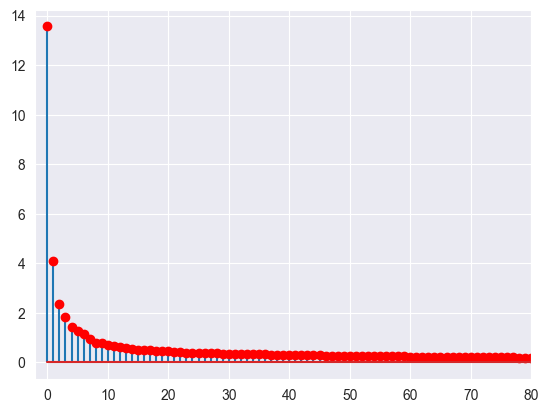

In [13]:
plt.stem(100*s/np.sum(s), markerfmt='ro')
plt.xlim(-2, 80)
plt.show()

In [14]:
import sys
print(sys.executable)

C:\Users\morte\anaconda3\python.exe


In [15]:
print(s)

[7.39307922e+04 2.22489334e+04 1.29062859e+04 9.94692660e+03
 7.89987039e+03 6.90384784e+03 6.26914558e+03 5.09081248e+03
 4.30156672e+03 4.23313607e+03 3.92141683e+03 3.71540643e+03
 3.37178819e+03 3.10975533e+03 2.99276297e+03 2.78780629e+03
 2.67820849e+03 2.66485740e+03 2.61230194e+03 2.54237279e+03
 2.48111609e+03 2.40113941e+03 2.25478642e+03 2.18090295e+03
 2.16411787e+03 2.13118898e+03 2.08495220e+03 2.07139098e+03
 1.99963372e+03 1.97203592e+03 1.90797892e+03 1.88225373e+03
 1.87016958e+03 1.84342148e+03 1.80819960e+03 1.78653807e+03
 1.76671087e+03 1.73109311e+03 1.68598933e+03 1.66120996e+03
 1.65456603e+03 1.63049754e+03 1.59523101e+03 1.57042036e+03
 1.56621806e+03 1.54808478e+03 1.53048848e+03 1.52088632e+03
 1.50239250e+03 1.47882590e+03 1.47186115e+03 1.44689137e+03
 1.44291493e+03 1.42881406e+03 1.38425178e+03 1.37196153e+03
 1.34848982e+03 1.34561000e+03 1.33092551e+03 1.31905503e+03
 1.29261044e+03 1.28314794e+03 1.27123619e+03 1.25831718e+03
 1.23704732e+03 1.221141

# Scaling the data

In [10]:
from sklearn.preprocessing import StandardScaler

load_array = np.array(BSBT_df)
scaler = StandardScaler()
load_array_standardized = scaler.fit_transform(load_array)

# Dimension Reductions

## Kernel PCA

In [22]:
from sklearn.decomposition import KernelPCA

n_components=120
# Perform Kernel PCA on the standardized data
kpca = KernelPCA(n_components=n_components, kernel='cosine', gamma=None, random_state=42)
reduced_dimensions = kpca.fit_transform(load_array_standardized)

## 3D Visualization

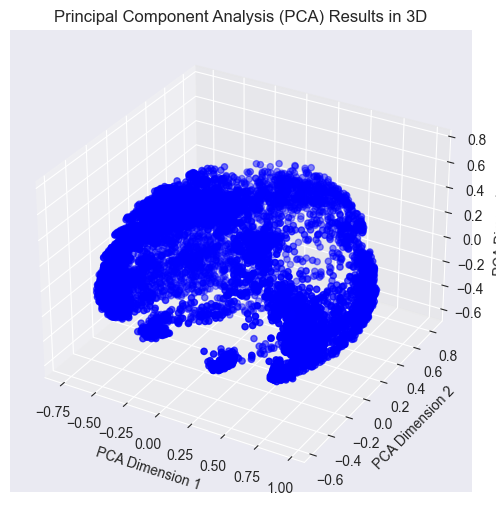

In [23]:
if n_components >= 3:
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(reduced_dimensions[:, 0], reduced_dimensions[:, 1], reduced_dimensions[:, 2], c='blue', marker='o')
    ax.set_xlabel('PCA Dimension 1')
    ax.set_ylabel('PCA Dimension 2')
    ax.set_zlabel('PCA Dimension 3')
    ax.set_title('Principal Component Analysis (PCA) Results in 3D')
    plt.show()

# Clustering Approaches

## K-means

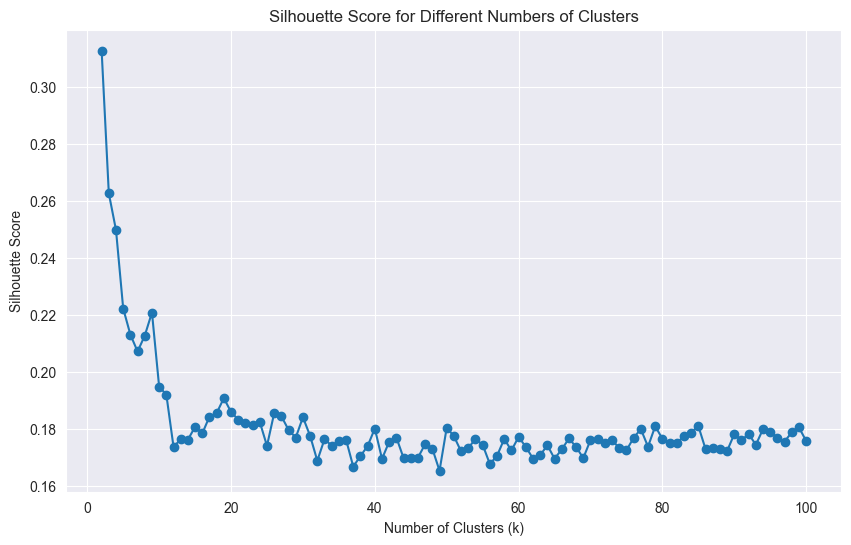

Optimal number of clusters (k): 2


In [24]:
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans

max_k=100

# Determine the optimal number of clusters using silhouette scores
silhouette_scores = []
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(reduced_dimensions)
    silhouette_avg = silhouette_score(reduced_dimensions, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores for different numbers of clusters
plt.figure(figsize=(10, 6))
plt.plot(range(2, max_k + 1), silhouette_scores, marker='o', label='Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.grid(True)
plt.show()

# Optimal number of clusters based on silhouette score
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2
print(f'Optimal number of clusters (k): {optimal_k}')    

## K_means for selected number of clusters

In [25]:
selected_k = 91
# Perform final clustering with the selected number of clusters
kmeans_optimal = KMeans(n_clusters=selected_k, n_init=10, random_state=42)
cluster_labels_optimal = kmeans_optimal.fit_predict(reduced_dimensions)
silhouette_scores_individual = silhouette_samples(reduced_dimensions, cluster_labels_optimal)

results_df = pd.DataFrame(data=reduced_dimensions, columns=[f'PCA_{i+1}' for i in range(n_components)])
results_df['Cluster'] = cluster_labels_optimal
#results_df['Load_Name'] = load_names
results_df['Silhouette_Score'] = silhouette_scores_individual

# Filtering step: Only include loads with a silhouette score >= 0.4
#results_df = results_df[results_df['Silhouette_Score'] >= 0.4].reset_index(drop=True)

In [19]:
print(results_df)

         PCA_1     PCA_2     PCA_3     PCA_4     PCA_5     PCA_6     PCA_7  \
0    -0.555648 -0.212487  0.163428 -0.242119  0.148709 -0.190760 -0.069643   
1    -0.586853 -0.244001  0.080271 -0.210404  0.196891 -0.204050 -0.045548   
2    -0.594020 -0.261544  0.020834 -0.171464  0.219575 -0.210053 -0.022989   
3    -0.598961 -0.293131 -0.013615 -0.143166  0.243391 -0.209895 -0.016880   
4    -0.600781 -0.303768 -0.051855 -0.127698  0.266822 -0.206823 -0.021183   
...        ...       ...       ...       ...       ...       ...       ...   
8755 -0.293761 -0.073016  0.513839 -0.199160  0.094262  0.009629 -0.033935   
8756 -0.380921 -0.093862  0.445753 -0.234913  0.016495 -0.028644 -0.052351   
8757 -0.421683 -0.129537  0.421594 -0.258158  0.016960 -0.064921 -0.055004   
8758 -0.458048 -0.139304  0.381242 -0.255007  0.024917 -0.090207 -0.038115   
8759 -0.516486 -0.188087  0.287949 -0.232627  0.075626 -0.106680  0.000431   

         PCA_8     PCA_9    PCA_10  ...    PCA_23    PCA_24    

## 3D Visualization

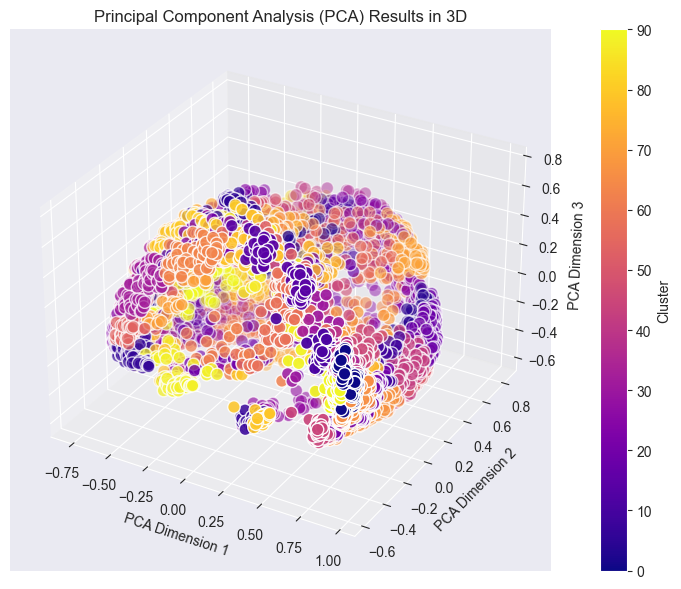

In [20]:
import matplotlib.colors as mcolors
import seaborn as sns

#colormap = 'tab20'
colormap = 'plasma'
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(results_df['PCA_1'], results_df['PCA_2'], results_df['PCA_3'],
                     c=results_df['Cluster'], cmap=colormap, edgecolor='w', s=80)

ax.set_xlabel('PCA Dimension 1')
ax.set_ylabel('PCA Dimension 2')
ax.set_zlabel('PCA Dimension 3')
ax.set_title('Principal Component Analysis (PCA) Results in 3D')

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Cluster')

plt.tight_layout()

plt.show()

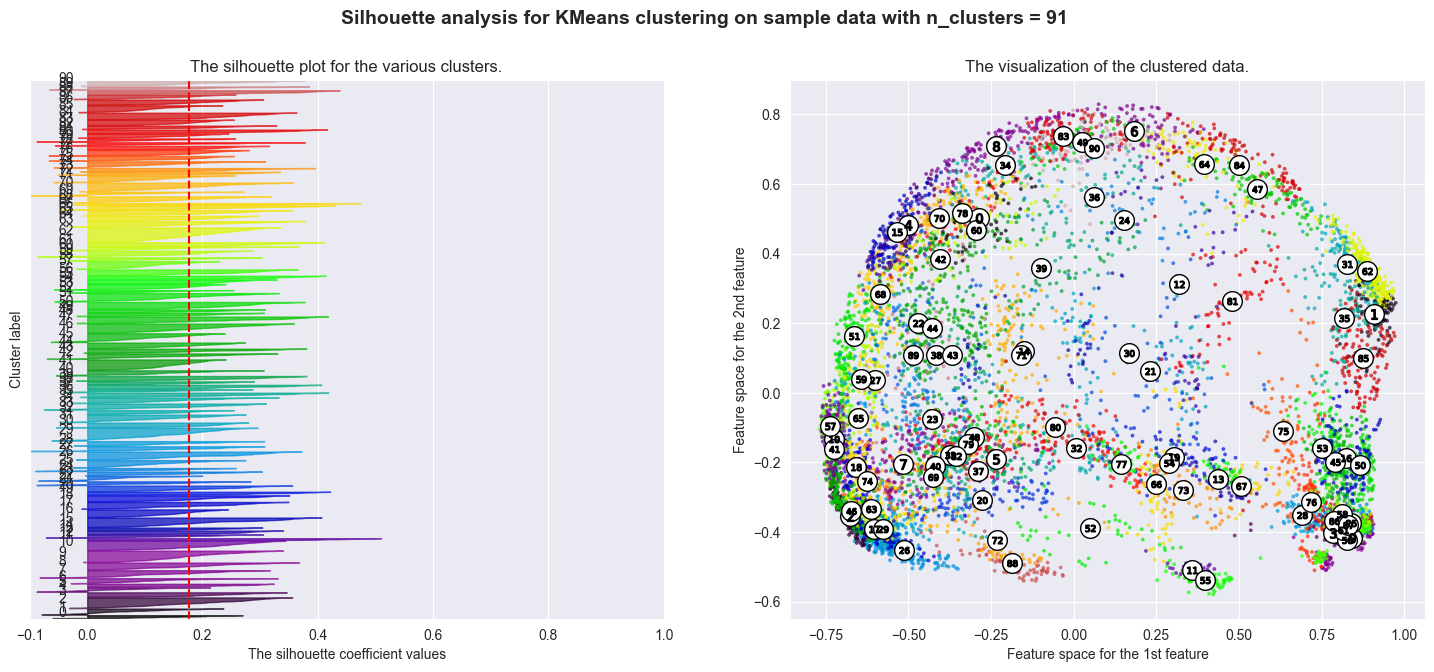

In [26]:
def plot_silhouette(X, cluster_labels, n_clusters):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Compute the average silhouette score for all samples
    avg_score = silhouette_score(X, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=avg_score, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = kmeans_optimal.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(f"Silhouette analysis for KMeans clustering on sample data with n_clusters = {n_clusters}",
                 fontsize=14, fontweight='bold')

    plt.show()

plot_silhouette(reduced_dimensions, cluster_labels_optimal, selected_k)

# Hierarchical cluster and dendrograms

## Using silouette for evaluation

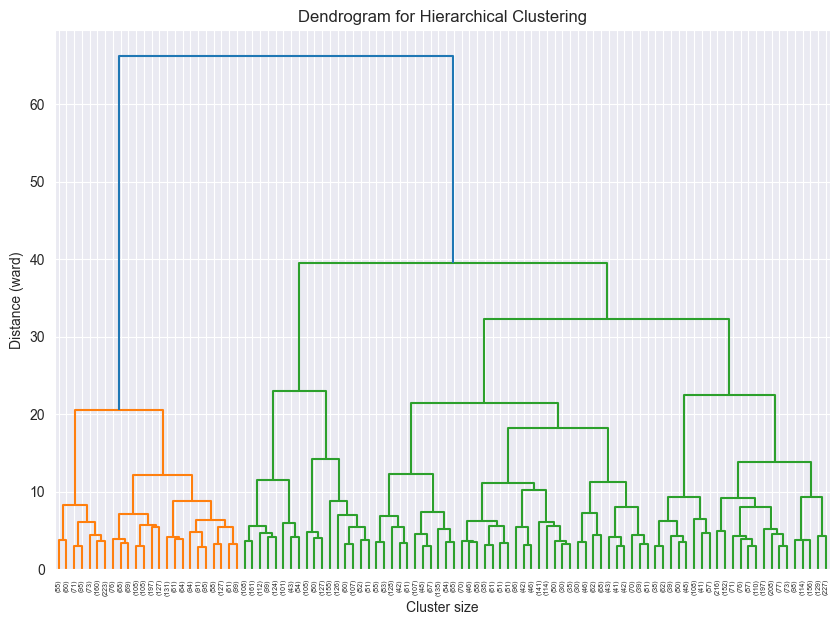

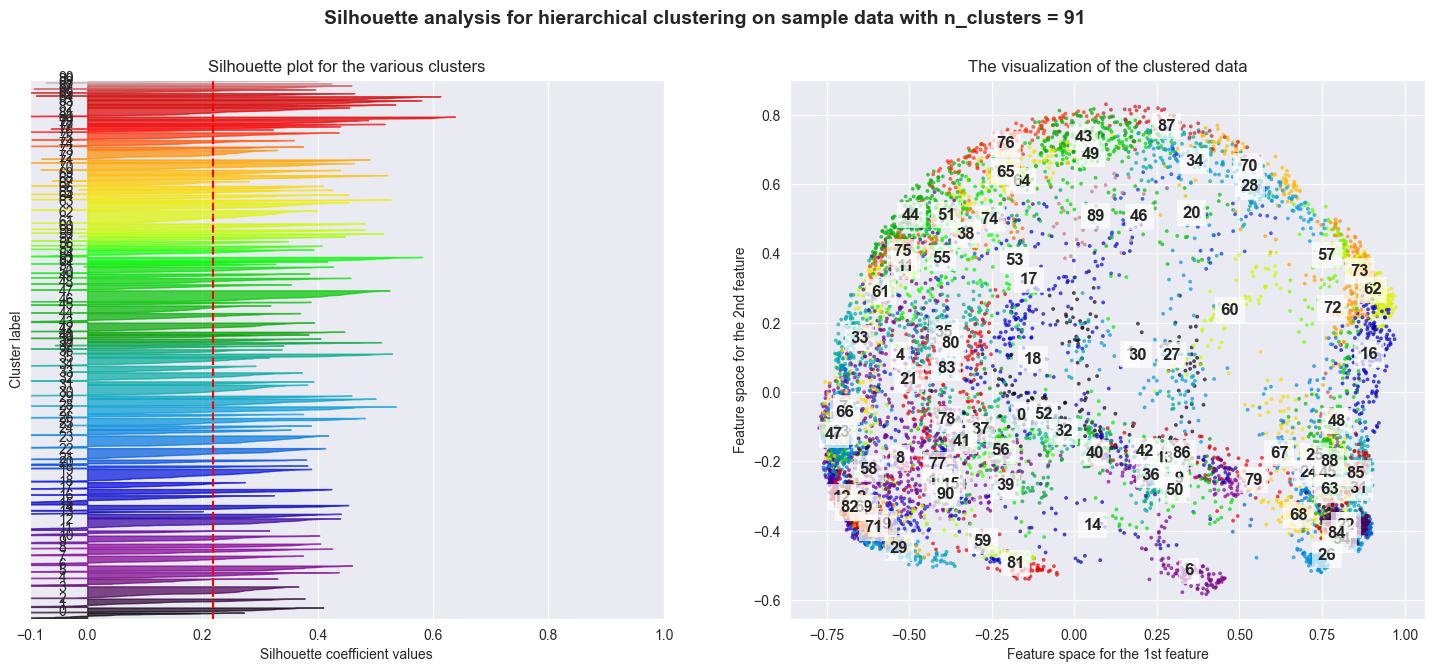

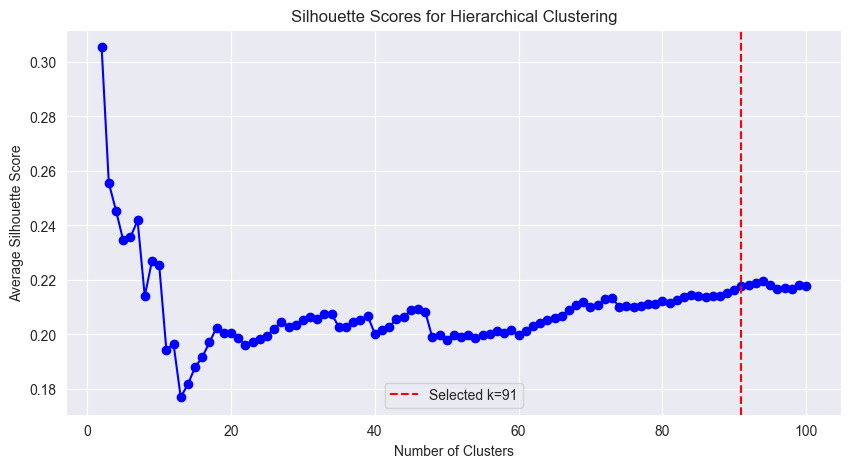

In [22]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

selected_k_Hierarchical=91
max_k=100

def plot_dendrogram_and_silhouette(X, max_k, selected_k):
    linked = linkage(X, method='ward')

    # Plot the dendrogram
    plt.figure(figsize=(10, 7))
    dendrogram(linked, truncate_mode='lastp', p=max_k)
    plt.title('Dendrogram for Hierarchical Clustering')
    plt.xlabel('Cluster size')
    plt.ylabel('Distance (ward)')
    plt.show()

    # Perform clustering with the selected number of clusters
    hierarchical = AgglomerativeClustering(n_clusters=selected_k, metric='euclidean', linkage='ward')
    cluster_labels = hierarchical.fit_predict(X)

    # Calculate silhouette scores
    silhouette_avg = silhouette_score(X, cluster_labels)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    # Create silhouette plot
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (selected_k + 1) * 10])

    y_lower = 10
    for i in range(selected_k):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / selected_k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title("Silhouette plot for the various clusters")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / selected_k)
    scatter = ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    # Add cluster numbers to the plot
    for i in range(selected_k):
        cluster_points = X[cluster_labels == i]
        centroid = np.mean(cluster_points, axis=0)
        ax2.text(centroid[0], centroid[1], str(i), fontweight='bold', fontsize=12,
                 ha='center', va='center', bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

    ax2.set_title("The visualization of the clustered data")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(f"Silhouette analysis for hierarchical clustering on sample data with n_clusters = {selected_k}",
                 fontsize=14, fontweight='bold')

    plt.show()

    # Plot silhouette scores for different k
    silhouette_scores = []
    for k in range(2, max_k + 1):
        hierarchical = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')
        cluster_labels = hierarchical.fit_predict(X)
        silhouette_avg = silhouette_score(X, cluster_labels)
        silhouette_scores.append(silhouette_avg)

    plt.figure(figsize=(10, 5))
    plt.plot(range(2, max_k + 1), silhouette_scores, marker='o', color='b')
    plt.axvline(x=selected_k, color='r', linestyle='--', label=f'Selected k={selected_k}')
    plt.title('Silhouette Scores for Hierarchical Clustering')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Average Silhouette Score')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_dendrogram_and_silhouette(reduced_dimensions, max_k, selected_k_Hierarchical)

## Using MSE instead of silouette

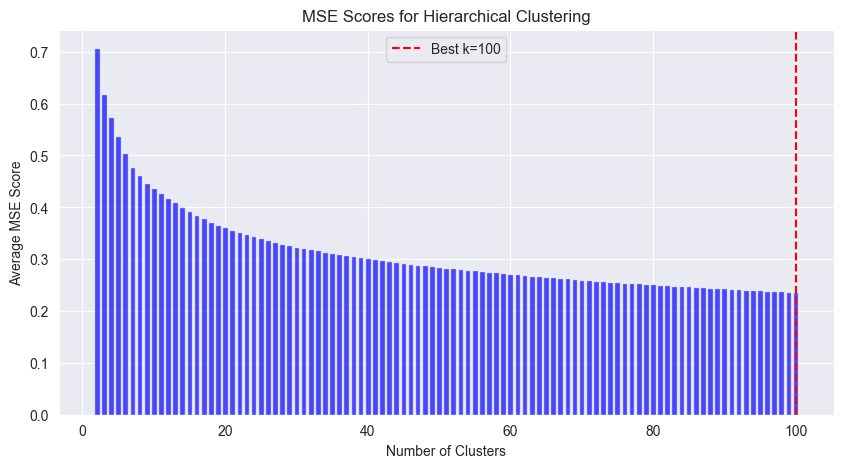

Best number of clusters (k) with least MSE: 100
Reference series for k=91 saved.


In [11]:
from sklearn.metrics import mean_squared_error
from sklearn.cluster import AgglomerativeClustering

max_k = 100
selected_k_Hierarchical = 91

# Function to calculate the MSE for each cluster and plot MSE for different k values
def calculate_mse_for_clusters(X, max_k, selected_k=None):
    mse_scores = []
    best_k = None
    min_mse = float('inf')

    for k in range(2, max_k + 1):
        # Perform clustering
        hierarchical = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')
        cluster_labels = hierarchical.fit_predict(X)

        mse_cluster_total = 0

        # Calculate MSE for each cluster
        for cluster_id in np.unique(cluster_labels):
            cluster_points = X[cluster_labels == cluster_id]
            reference_time_series = np.mean(cluster_points, axis=0)  # Average of cluster

            # Calculate MSE of all points in the cluster w.r.t. the reference time series
            for point in cluster_points:
                mse_cluster_total += mean_squared_error(point, reference_time_series)

        # Calculate the average MSE for this k
        average_mse = mse_cluster_total / len(X)
        mse_scores.append(average_mse)

        # Keep track of the best k with the lowest MSE
        if average_mse < min_mse:
            min_mse = average_mse
            best_k = k

    # Plot MSE for different k
    plt.figure(figsize=(10, 5))
    plt.bar(range(2, max_k + 1), mse_scores, color='b', alpha=0.7)
    plt.axvline(x=best_k, color='r', linestyle='--', label=f'Best k={best_k}')
    plt.title('MSE Scores for Hierarchical Clustering')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Average MSE Score')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"Best number of clusters (k) with least MSE: {best_k}")

    # Optionally save average reference series for the selected k if provided
    if selected_k is not None:
        save_reference_series(X, selected_k)

    return best_k

# Function to save the reference time series for the selected k
def save_reference_series(X, selected_k):
    # Perform clustering with the selected k
    hierarchical = AgglomerativeClustering(n_clusters=selected_k, metric='euclidean', linkage='ward')
    cluster_labels = hierarchical.fit_predict(X)

    reference_series_dict = {}

    # Save the reference (average) time series for each cluster
    for cluster_id in np.unique(cluster_labels):
        cluster_points = X[cluster_labels == cluster_id]
        reference_time_series = np.mean(cluster_points, axis=0)  # Average of cluster
        reference_series_dict[cluster_id] = reference_time_series

    # Save the reference series to a file or return as needed
    np.save(f'reference_series_k_{selected_k}.npy', reference_series_dict)
    print(f"Reference series for k={selected_k} saved.")


best_k = calculate_mse_for_clusters(load_array_standardized, max_k, selected_k_Hierarchical)


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

max_k = 100
selected_k_Hierarchical = 91

# Assuming load_array_standardized is the standardized data and scaler is the scaler used for standardization.
# scaler.inverse_transform(load_array_standardized) will give the original scale data back.

# Function to calculate the MSE for each cluster and plot MSE for different k values
def calculate_mse_for_clusters(X_standardized, scaler, max_k, selected_k=None):
    mse_scores = []
    best_k = None
    min_mse = float('inf')

    # Get the original data by inverse transforming the standardized data
    X_original = scaler.inverse_transform(X_standardized)

    for k in range(2, max_k + 1):
        # Perform clustering on the standardized data
        hierarchical = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')
        cluster_labels = hierarchical.fit_predict(X_standardized)

        mse_cluster_total = 0

        # Calculate MSE for each cluster using the original data
        for cluster_id in np.unique(cluster_labels):
            cluster_points_original = X_original[cluster_labels == cluster_id]
            reference_time_series = np.mean(cluster_points_original, axis=0)  # Average of cluster (original scale)

            # Calculate MSE of all points in the cluster w.r.t. the reference time series
            for point in cluster_points_original:
                mse_cluster_total += mean_squared_error(point, reference_time_series)

        # Calculate the average MSE for this k
        average_mse = mse_cluster_total / len(X_original)
        mse_scores.append(average_mse)

        # Keep track of the best k with the lowest MSE
        if average_mse < min_mse:
            min_mse = average_mse
            best_k = k

    # Plot MSE for different k
    plt.figure(figsize=(10, 5))
    plt.bar(range(2, max_k + 1), mse_scores, color='b', alpha=0.7)
    plt.axvline(x=best_k, color='r', linestyle='--', label=f'Best k={best_k}')
    plt.title('MSE Scores for Hierarchical Clustering (Original Scale)')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Average MSE Score')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"Best number of clusters (k) with least MSE: {best_k}")

    # Optionally save the average reference series for the selected k if provided
    if selected_k is not None:
        save_reference_series(X_standardized, scaler, selected_k)

    return best_k

# Function to save the reference time series for the selected k using original data
def save_reference_series(X_standardized, scaler, selected_k):
    # Get the original data by inverse transforming the standardized data
    X_original = scaler.inverse_transform(X_standardized)

    # Perform clustering with the selected k on the standardized data
    hierarchical = AgglomerativeClustering(n_clusters=selected_k, metric='euclidean', linkage='ward')
    cluster_labels = hierarchical.fit_predict(X_standardized)

    reference_series_dict = {}

    # Save the reference (average) time series for each cluster
    for cluster_id in np.unique(cluster_labels):
        cluster_points_original = X_original[cluster_labels == cluster_id]
        reference_time_series = np.mean(cluster_points_original, axis=0)  # Average of cluster (original scale)
        reference_series_dict[cluster_id] = reference_time_series

    # Save the reference series to a file or return as needed
    np.save(f'reference_series_k_{selected_k}_original.npy', reference_series_dict)
    print(f"Reference series for k={selected_k} saved in original scale.")


# Example usage:
# Assuming 'load_array_standardized' is the standardized data and 'scaler' is the StandardScaler used for it
best_k = calculate_mse_for_clusters(load_array_standardized, scaler, max_k, selected_k_Hierarchical)


# Gaussian Mixture Model(GMM)

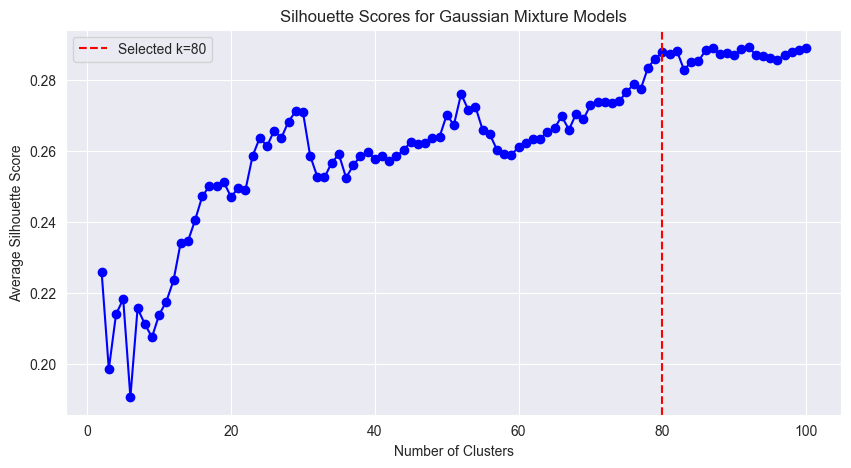

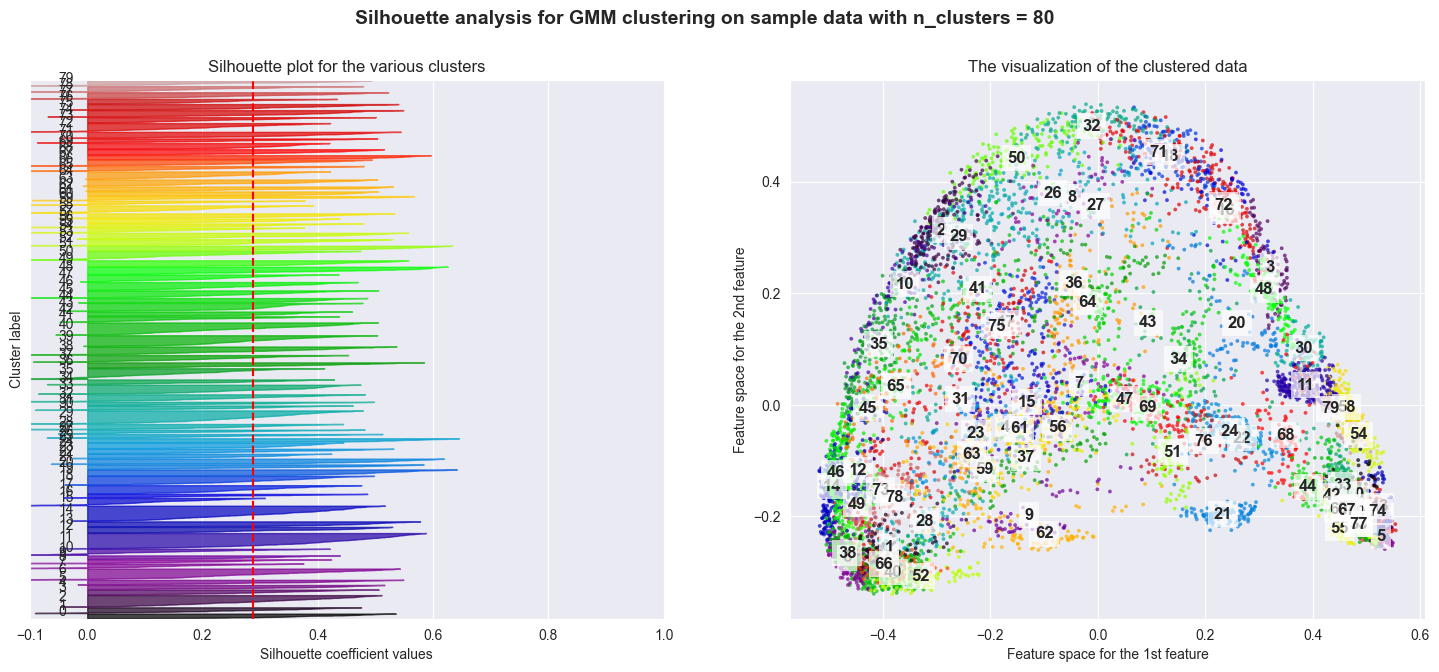

In [26]:
from sklearn.mixture import GaussianMixture

max_k = 100
selected_k_gmm=80

def plot_gmm_silhouette(X, max_k, selected_k):
    # Calculate silhouette scores for different k
    silhouette_scores = []
    for k in range(2, max_k + 1):
        gmm = GaussianMixture(n_components=k, random_state=42)
        cluster_labels = gmm.fit_predict(X)
        silhouette_avg = silhouette_score(X, cluster_labels)
        silhouette_scores.append(silhouette_avg)

    # Plot silhouette scores
    plt.figure(figsize=(10, 5))
    plt.plot(range(2, max_k + 1), silhouette_scores, marker='o', color='b')
    plt.axvline(x=selected_k, color='r', linestyle='--', label=f'Selected k={selected_k}')
    plt.title('Silhouette Scores for Gaussian Mixture Models')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Average Silhouette Score')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Perform clustering with the selected number of clusters
    gmm = GaussianMixture(n_components=selected_k, random_state=42)
    cluster_labels = gmm.fit_predict(X)

    # Calculate silhouette scores
    silhouette_avg = silhouette_score(X, cluster_labels)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    # Create silhouette plot
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (selected_k + 1) * 10])

    y_lower = 10
    for i in range(selected_k):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / selected_k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title("Silhouette plot for the various clusters")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / selected_k)
    scatter = ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    # Add cluster numbers to the plot
    for i in range(selected_k):
        cluster_points = X[cluster_labels == i]
        centroid = np.mean(cluster_points, axis=0)
        ax2.text(centroid[0], centroid[1], str(i), fontweight='bold', fontsize=12,
                 ha='center', va='center', bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

    ax2.set_title("The visualization of the clustered data")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(f"Silhouette analysis for GMM clustering on sample data with n_clusters = {selected_k}",
                 fontsize=14, fontweight='bold')

    plt.show()

plot_gmm_silhouette(reduced_dimensions, max_k, selected_k_gmm)